In [1]:
cd /Users/dcox/Dropbox/InsightFellowship/Glimpse/

/Users/dcox/Dropbox/InsightFellowship/Glimpse


## Standard setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [3]:
most_feats = pd.read_csv('most_feats_cont.csv')

In [4]:
mostFeats_MathOutc = most_feats['ScantronMathPostTest']
mostFeats_ReadOutc = most_feats['ScantronReadingPostTest']
mostFeats_pred = most_feats.drop(['ScantronMathPostTest', 'ScantronReadingPostTest'], axis=1)

In [5]:
mostFeats_predCols = list(mostFeats_pred)
mostFeats_predCodes = []
for i in mostFeats_predCols:
    mostFeats_pred[i] = mostFeats_pred[i].astype('category')
    d = dict(enumerate(mostFeats_pred[i].cat.categories))
    mostFeats_predCodes.append(d)
    mostFeats_pred[i] = mostFeats_pred[i].astype('category')
    mostFeats_pred[i] = mostFeats_pred[i].cat.codes

In [6]:
# Function we'll use for plotting throughout. 
def line_plot(x):
    '''Returns lineplot of r^2 values for model tested.'''
    plt.plot(r2_vals, marker='o', color='black')
    plt.xlabel('Hyperparam Values Order')
    plt.ylabel('R^2')
    print("Highest R^2:", max(x))

# Create a list of all student-teacher combinations for predictions. 

In [7]:
teachers = mostFeats_pred['TNUM'].unique()
print('Number of Unique Teachers:', len(teachers))

Number of Unique Teachers: 278


In [8]:
grade = mostFeats_pred['GR'].unique()
print('Number of Unique Grades:', len(grade))

Number of Unique Grades: 6


In [9]:
# Only showing grades 3-4 for the demo. 
student3 = mostFeats_pred.loc[mostFeats_pred['GR'] == 3]
student4 = mostFeats_pred.loc[mostFeats_pred['GR'] == 4]
student5 = mostFeats_pred.loc[mostFeats_pred['GR'] == 5]

In [10]:
teach3 = student3['TNUM'].unique()
teach4 = student4['TNUM'].unique()
teach5 = student5['TNUM'].unique()

In [11]:
# Generate df for predictions for all third and fourth graders who might stay in in the same grade or advance to the next grade. 
all_pred = []
for i in teach3:
    data = student3.copy()
    data.GR = 3
    data.TNUM = i
    all_pred.append(data)
for i in teach4:
    data = student3.copy()
    data.GR = 4
    data.TNUM = i
    all_pred.append(data)
for i in teach5:
    data = student3.copy()
    data.GR = 5
    data.TNUM = i
    all_pred.append(data)
for i in teach4:
    data = student4.copy()
    data.GR = 4
    data.TNUM = i
    all_pred.append(data)
for i in teach5:
    data = student4.copy()
    data.GR = 5
    data.TNUM = i
    all_pred.append(data)
all_pred = pd.concat(all_pred)
print("Length:", len(all_pred))
print("Expected Length:", len(student3)*len(teach3) + len(student3)*len(teach4) + len(student3)*len(teach5) +
     len(student4)*len(teach4) + len(student4)*len(teach5))

Length: 2075109
Expected Length: 2075109


In [12]:
all_pred.to_csv('all_pred.csv')

# The top models were:
- Continuous outcome variables: k-Nearest Neighbors using the most features dataset. 
- Binary outcome variables: Random Forest using the most features dataset with the engineered feature of pre-to-mid-test change. 

## Math outcomes. 

Highest R^2: 0.7520271558379724


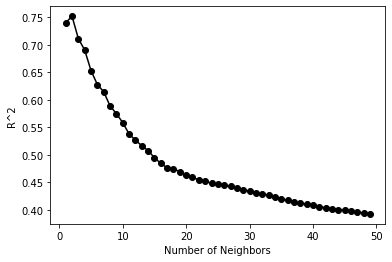

In [13]:
from sklearn.neighbors import KNeighborsRegressor
# Math outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_MathOutc, test_size=0.20, random_state = 649)
r2_vals = []
neighbors = list(range(1, 50))
for i in neighbors:
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    score = r2_score(y_test, y_pred)
    r2_vals.append(score)
plt.plot(neighbors, r2_vals, marker='o', color='black')
plt.xlabel('Number of Neighbors')
plt.ylabel('R^2')
print("Highest R^2:", max(r2_vals))

#### Optimal neighbors looks like 2. Create model using that number of neighbors. 

In [14]:
# Make sure we identified the right number of neighbors. 
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_MathOutc, test_size=0.20, random_state=649)
math_neigh = KNeighborsRegressor(n_neighbors=2)
math_neigh_fit = math_neigh.fit(X_train, y_train)
y_pred = math_neigh.predict(X_test)
score = r2_score(y_test, y_pred)
print(score) # should be 0.752271558379724

0.7520271558379724


In [15]:
# Train final math model
math_neigh_final = math_neigh.fit(mostFeats_pred, mostFeats_MathOutc)

### Fit the math model to make predictions about all student-teacher combinations. 

In [16]:
# Fit model to prediction data. 
math_final_predict = math_neigh_final.predict(all_pred)

# Save to .csv
all_pred.to_csv('all_pred.csv')

# Reading outcomes. 

Highest R^2: 0.8120433606436155


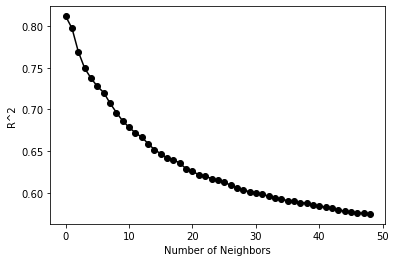

In [17]:
# Reading outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_ReadOutc, test_size=0.20, random_state = 649)
r2_vals = []
neighbors = list(range(1, 50))
for i in neighbors:
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    score = r2_score(y_test, y_pred)
    r2_vals.append(score)
plt.plot(r2_vals, marker='o', color='black')
plt.xlabel('Number of Neighbors')
plt.ylabel('R^2')
print("Highest R^2:", max(r2_vals))

#### Optimal neighbors looks like 1. Create model using that number of neighbors. 

In [18]:
# Make sure we got the right neighbor number. 
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_ReadOutc, test_size=0.20, random_state=649)
read_neigh = KNeighborsRegressor(n_neighbors=1)
read_neigh_fit = read_neigh.fit(X_train, y_train)
y_pred = read_neigh.predict(X_test)
score = r2_score(y_test, y_pred)
print(score) # should be 0.0.8120433606436155

0.8120433606436155


In [19]:
# Train final reading model
read_neigh_final = read_neigh.fit(mostFeats_pred, mostFeats_ReadOutc)

In [20]:
# Fit model to prediction data. 
read_final_predict = read_neigh_final.predict(all_pred)

# Save to .csv
all_pred.to_csv('all_pred.csv')

# Append math and reading predictions to the dataframe. 

In [21]:
all_pred['math_prediction'] = math_final_predict
all_pred['read_prediction'] = read_final_predict
all_pred.to_csv('all_pred.csv')